In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
sns.set(color_codes=True)
df = pd.read_excel("../techlabs-elective/realtor.spring.2020.xlsx")
df.head(10)

,sold.price,zip.code,overview,type,year.built,num.beds,num.baths,living.area,lot.area,masterbedroom.length,masterbedroom.width,kitchen.length,kitchen.width,rand
0,3000000.0,2108,\n Property Overview - Beacon Hill gr...,Condo/Townhome/Row Home/Co-Op,1899,2,1.5,2352,NaN,15.0,15.0,12.0,10.0,0.001732
1,1150000.0,2476,\n Property Overview - Quality builde...,Single Family Home,1959,4,3.5,2713,6890.00,17.0,11.0,25.0,12.0,0.003026
2,1095000.0,1890,\n Property Overview - This surprisin...,Single Family Home,1960,4,3.5,2821,0.36,20.0,19.0,25.0,16.0,0.004115
3,689000.0,2118,\n Property Overview - Sound End Styl...,Condo/Townhome/Row Home/Co-Op,1855,1,1.0,595,NaN,13.0,12.0,8.0,8.0,0.004413
4,842700.0,2492,\n Property Overview - Welcome to thi...,Single Family Home,1974,3,2.0,1476,0.23,11.0,15.0,11.0,12.0,0.013653
5,300000.0,2467,\n Property Overview - This is a grea...,Condo/Townhome/Row Home/Co-Op,1955,2,1.0,780,NaN,12.0,12.0,13.0,9.0,0.014122
6,840000.0,2130,\n Property Overview - This beautiful...,Condo/Townhome/Row Home/Co-Op,1910,3,2.0,1133,1133.00,14.0,11.0,12.0,12.0,0.015632
7,751000.0,2472,\n Property Overview - Immaculate 3 b...,Single Family Home,1950,3,2.5,2003,5000.00,15.0,15.0,11.0,13.0,0.022707
8,730000.0,1945,\n Property Overview - Multiple Offer...,Single Family Home,1935,5,2.5,2967,7565.00,22.0,13.0,23.0,16.0,0.023967
9,580000.0,2128,\n Property Overview - Multiple offer...,Condo/Townhome/Row Home/Co-Op,2012,3,2.0,1417,NaN,15.0,14.0,12.0,17.0,0.025222


In [2]:
df.describe()


,sold.price,zip.code,year.built,num.beds,num.baths,living.area,lot.area,masterbedroom.length,masterbedroom.width,kitchen.length,kitchen.width,rand
count,5.500000e+02,566.000000,566.000000,566.000000,566.000000,566.000000,268.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,7.858710e+05,2138.909894,1937.653710,2.660777,1.835689,1551.920495,2680.015410,14.743516,13.141343,13.263198,11.426378,0.516508
std,5.637090e+05,116.886257,48.165903,1.048277,0.847400,891.972413,2633.832448,3.543703,2.820309,4.083784,3.276509,0.289633
min,1.600000e+05,1730.000000,1725.000000,1.000000,1.000000,410.000000,0.230000,8.000000,6.000000,5.000000,5.000000,0.001732
25%,4.900000e+05,2124.000000,1900.000000,2.000000,1.000000,1007.250000,707.000000,12.000000,11.000000,10.000000,9.000000,0.252851
50%,6.430000e+05,2130.000000,1921.000000,3.000000,2.000000,1297.000000,1299.000000,14.000000,12.415000,13.000000,11.000000,0.529830
75%,8.400000e+05,2132.000000,1976.750000,3.000000,2.000000,1849.750000,5000.000000,16.000000,14.000000,15.000000,13.000000,0.770276
max,6.700000e+06,2494.000000,2019.000000,7.000000,6.000000,6537.000000,9583.000000,36.000000,29.000000,34.000000,26.000000,0.997843


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sold.price            550 non-null    float64
 1   zip.code              566 non-null    int64  
 2   overview              566 non-null    object 
 3   type                  566 non-null    object 
 4   year.built            566 non-null    int64  
 5   num.beds              566 non-null    int64  
 6   num.baths             566 non-null    float64
 7   living.area           566 non-null    int64  
 8   lot.area              268 non-null    float64
 9   masterbedroom.length  566 non-null    float64
 10  masterbedroom.width   566 non-null    float64
 11  kitchen.length        566 non-null    float64
 12  kitchen.width         566 non-null    float64
 13  rand                  566 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 62.0+ KB


In [4]:
df.corr()


,sold.price,zip.code,year.built,num.beds,num.baths,living.area,lot.area,masterbedroom.length,masterbedroom.width,kitchen.length,kitchen.width,rand
sold.price,1.000000,0.105761,-0.038248,0.365549,0.586637,0.608972,-0.136665,0.272642,0.364221,0.142907,0.123579,0.040459
zip.code,0.105761,1.000000,-0.001838,0.093165,0.135127,0.133452,0.001942,0.088436,0.082734,0.037911,-0.001571,-0.061418
year.built,-0.038248,-0.001838,1.000000,0.016493,0.213447,0.118654,-0.033867,0.097843,0.144678,-0.012121,0.073516,0.003257
num.beds,0.365549,0.093165,0.016493,1.000000,0.630515,0.779764,0.234472,0.236122,0.287139,0.307283,0.311860,-0.023947
num.baths,0.586637,0.135127,0.213447,0.630515,1.000000,0.806117,-0.050603,0.346406,0.406436,0.311682,0.313565,0.031538
living.area,0.608972,0.133452,0.118654,0.779764,0.806117,1.000000,0.006187,0.407422,0.473938,0.376574,0.376289,0.009879
lot.area,-0.136665,0.001942,-0.033867,0.234472,-0.050603,0.006187,1.000000,-0.030497,-0.064725,-0.033112,0.062658,0.099040
masterbedroom.length,0.272642,0.088436,0.097843,0.236122,0.346406,0.407422,-0.030497,1.000000,0.143000,0.225887,0.158815,0.042012
masterbedroom.width,0.364221,0.082734,0.144678,0.287139,0.406436,0.473938,-0.064725,0.143000,1.000000,0.103536,0.219367,0.014108
kitchen.length,0.142907,0.037911,-0.012121,0.307283,0.311682,0.376574,-0.033112,0.225887,0.103536,1.000000,0.323506,-0.061353


In [5]:
df.drop(df.columns[[2,3,8,9,10,11,12,13]], axis=1, inplace=True)
df.head()

,sold.price,zip.code,year.built,num.beds,num.baths,living.area
0,3000000.0,2108,1899,2,1.5,2352
1,1150000.0,2476,1959,4,3.5,2713
2,1095000.0,1890,1960,4,3.5,2821
3,689000.0,2118,1855,1,1.0,595
4,842700.0,2492,1974,3,2.0,1476


In [6]:
df['sold.price'] = df['sold.price'].fillna((df['sold.price'].mean()))

In [7]:
df.iloc[115]

sold.price     785870.967273
zip.code         2134.000000
year.built       1989.000000
num.beds            1.000000
num.baths           1.000000
living.area       771.000000
Name: 115, dtype: float64

In [9]:
heatmap1_data = pd.pivot_table(df, values='sold.price', 
                     index=['num.baths'], 
                     columns='living.area')

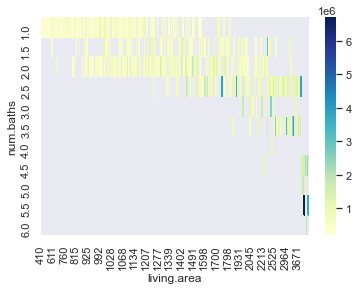

In [10]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")

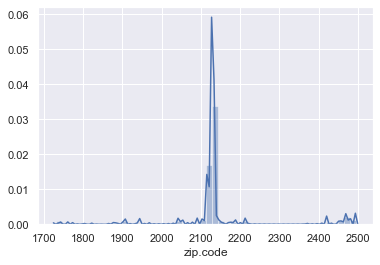

In [11]:
sns.distplot(df['zip.code'])

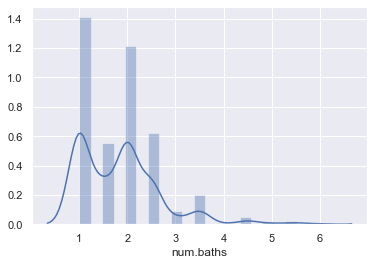

In [12]:
sns.distplot(df['num.baths'])

(array([415., 112.,  24.,   6.,   2.,   6.,   0.,   0.,   0.,   1.]),
 array([ 160000.,  814000., 1468000., 2122000., 2776000., 3430000.,
        4084000., 4738000., 5392000., 6046000., 6700000.]),
 <a list of 10 Patch objects>)

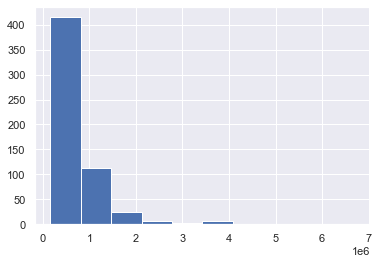

In [40]:
plt.hist(df["sold.price"].dropna())

In [41]:
df.type > 0

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
df.info()


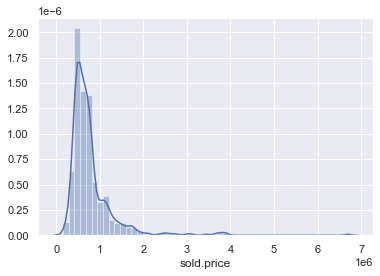

In [19]:
sns.distplot(df['sold.price'])

In [20]:
df['sold.price'].describe()

count    5.660000e+02
mean     7.858710e+05
std      5.556699e+05
min      1.600000e+05
25%      4.950000e+05
50%      6.500000e+05
75%      8.290000e+05
max      6.700000e+06
Name: sold.price, dtype: float64

In [ ]:
df.sold.price.value_counts(normalize=True).plot.barh()
plt.show()

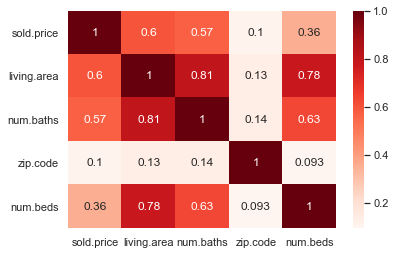

In [21]:
sns.heatmap(df[['sold.price','living.area','num.baths', 'zip.code', 'num.beds']].corr(), annot=True, cmap = 'Reds')
plt.show()

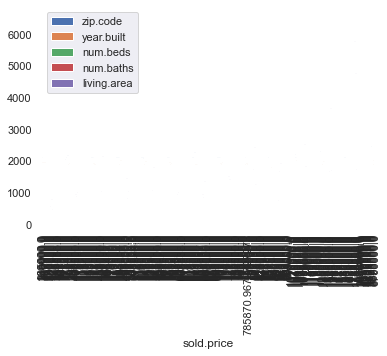

In [22]:
df.groupby('sold.price').mean().plot.bar()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


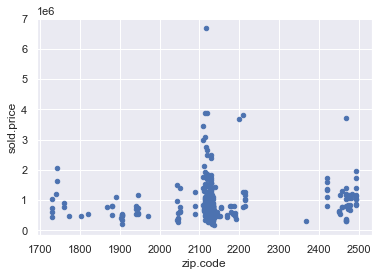

In [23]:
df.plot.scatter(x='zip.code', y='sold.price')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


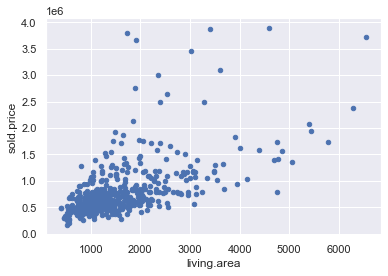

In [35]:
indexNames = df[df['sold.price'] > 6000000 ].index
df.drop(indexNames , inplace=True)
df.plot.scatter(x='living.area', y='sold.price')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


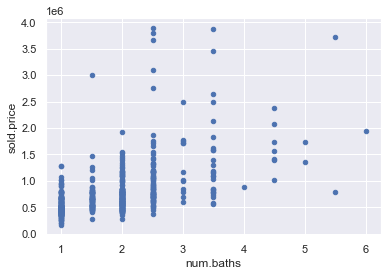

In [36]:
df.plot.scatter(x='num.baths', y='sold.price')
plt.show()

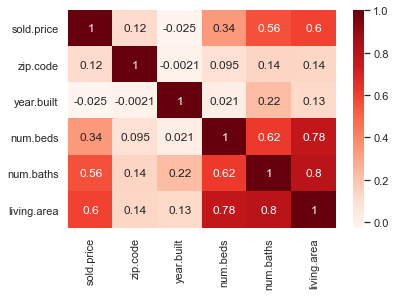

In [37]:
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')
plt.show()

In [38]:
y=df['sold.price'].values
X=df.drop('sold.price', axis=1).values

#create training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [39]:
#create regressor
reg = LinearRegression()

In [40]:
reg.fit(X_train, y_train)

LinearRegression()

In [41]:
y_predict = reg.predict(X_test)

print("R^2: {}".format(reg.score(X_test, y_test)))

R^2: 0.4773655730841183


In [42]:
cv_scores = cross_val_score(reg, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.30033364 0.62806921 0.19114182 0.43148006 0.36698841]
Average 5-Fold CV Score: 0.383602627017996
